<a href="https://colab.research.google.com/github/BushraAlmutiri/MedicalInsurance/blob/main/gp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from flask import Flask, request, jsonify
import sqlite3
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import requests

In [2]:
app = Flask(__name__)

In [4]:
df = pd.read_csv("insurance.csv") #loadDataSet

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info() #dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


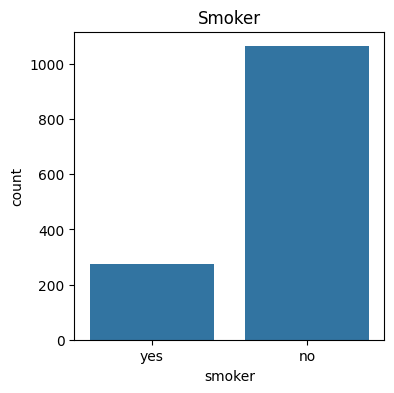

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

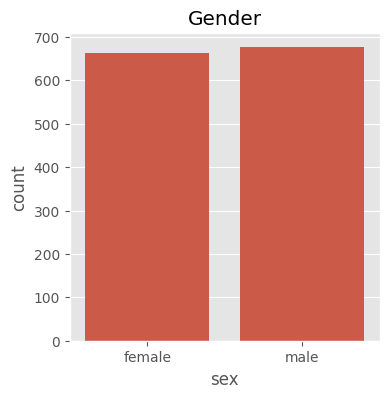

In [11]:
plt.figure(figsize=(4,4))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender')
plt.show()

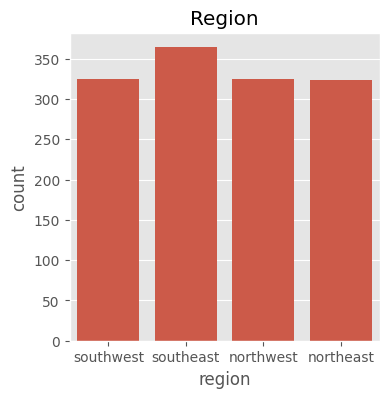

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, ' charges vs Region')

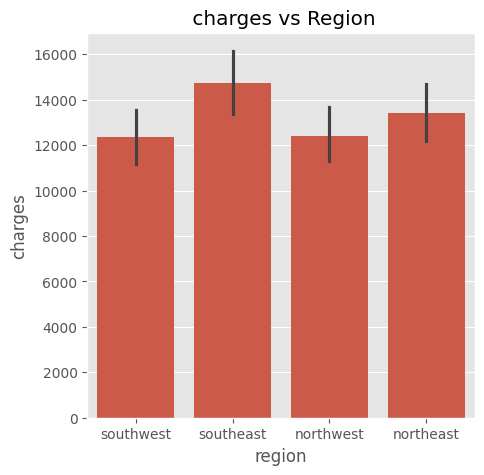

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title(' charges vs Region')

Text(0.5, 1.0, 'Charges for smokers')

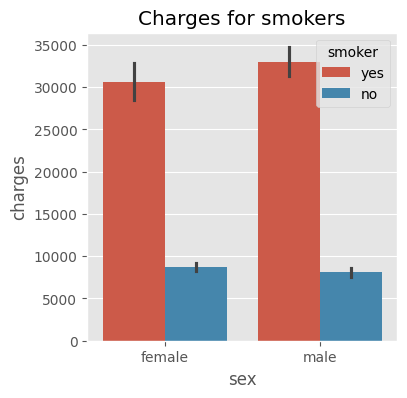

In [14]:
plt.figure(figsize=(4,4))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

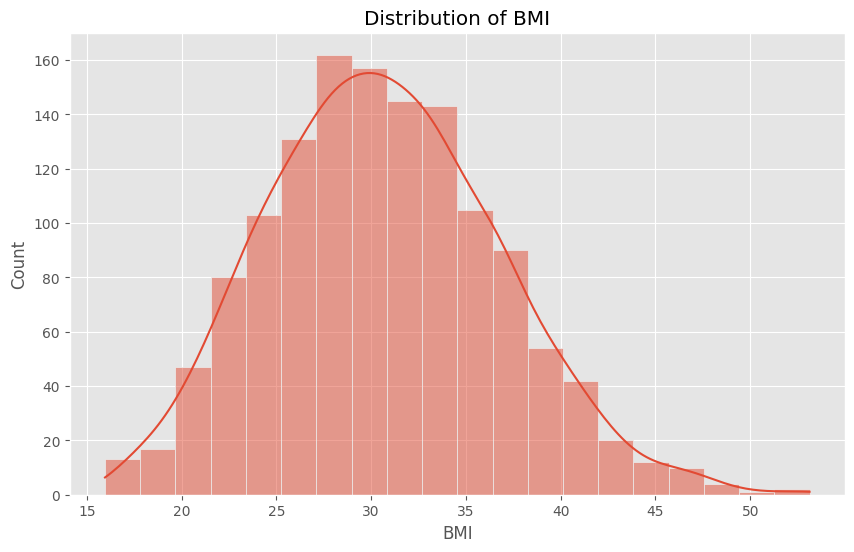

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', bins=20, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

<ipython-input-16-38c6e60d3b80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


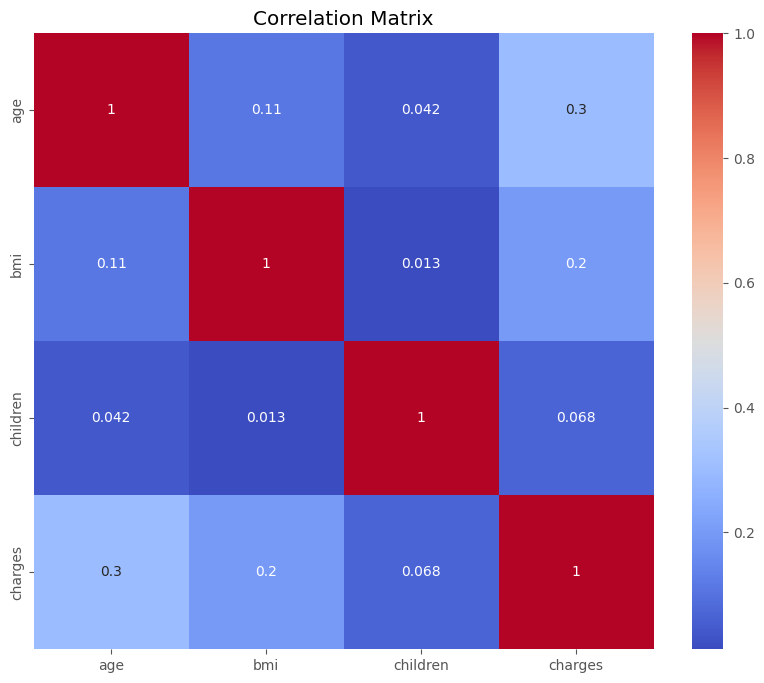

In [16]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
correlation_matrix = df.corr(numeric_only=True)
plt.show()

In [17]:
df['sex'] = df['sex'].apply({'male': 0, 'female': 1}.get)
df['smoker'] = df['smoker'].apply({'yes': 1, 'no': 0}.get)
df['region'] = df['region'].apply({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}.get)

In [18]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
linear_regression_model = LinearRegression()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()

In [21]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [22]:
svr_model.fit(X_train, y_train)

SVR()

In [23]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
linear_regression_predictions = linear_regression_model.predict(X_test)

In [25]:
svr_predictions = svr_model.predict(X_test)

In [26]:
decision_tree_predictions = decision_tree_model.predict(X_test)

In [27]:
with open('linear_regression_model.pkl', 'wb') as f:
        pickle.dump(linear_regression_model, f)

with open('svr_model.pkl', 'wb') as f:
        pickle.dump(svr_model, f)

with open('decision_tree_model.pkl', 'wb') as f:
        pickle.dump(decision_tree_model, f)

In [28]:
data = {'age':19 , 'sex':1 , 'bmi':27.9 , 'children':0 , 'smoker':1 , 'region':1 }
index = [0]

In [29]:
cust_df = pd.DataFrame(data, index)

In [30]:
print(cust_df)

   age  sex   bmi  children  smoker  region
0   19    1  27.9         0       1       1


In [31]:
cust_df = cust_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [32]:
cost_pred_linear_regression = linear_regression_model.predict(cust_df)

In [33]:
print("Linear Regression Prediction:", cost_pred_linear_regression)

Linear Regression Prediction: [25139.73133878]


In [34]:
cost_pred_svr = svr_model.predict(cust_df)

In [35]:
print("SVR Prediction:", cost_pred_svr)

SVR Prediction: [9419.24340541]


In [36]:
cost_pred_decision_tree = decision_tree_model.predict(cust_df)

In [37]:
print("Decision Tree Prediction:", cost_pred_decision_tree)

Decision Tree Prediction: [16884.924]


In [38]:
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)

In [39]:
print("Mean Squared Error Linear Regression:", linear_regression_mse)

Mean Squared Error Linear Regression: 33635210.431178406


In [40]:
svr_mse = mean_squared_error(y_test, svr_predictions)

In [41]:
print("Mean Squared Error SVR:", svr_mse)

Mean Squared Error SVR: 166472893.61732146


In [42]:
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)

In [43]:
print("Mean Squared Error Decision Tree :", decision_tree_mse)

Mean Squared Error Decision Tree : 39014502.45822192


In [44]:
conn = sqlite3.connect('medical_insurance.db')

In [45]:
c = conn.cursor()

In [46]:
c.execute('''CREATE TABLE IF NOT EXISTS predictions
       (age INTEGER, sex INTEGER, bmi REAL, children INTEGER, smoker INTEGER, region INTEGER,
        linear_regression_prediction REAL, svr_prediction REAL, decision_tree_prediction REAL, best_model TEXT)''')

In [47]:
@app.route('/predict', methods=['POST'])
def predict():
    prediction_result = perform_prediction()

In [48]:
input_data = {
        'age': 25,
        'sex': 1,
        'bmi': 27.9,
        'children': 2,
        'smoker': 0,
        'region': 3
    }

In [49]:
input_values = [input_data['age'], input_data['sex'], input_data['bmi'], input_data['children'], input_data['smoker'], input_data['region']]

In [50]:
input_data = np.array([input_values])

In [51]:
linear_regression_prediction = linear_regression_model.predict(input_data)[0]
svr_prediction = svr_model.predict(input_data)[0]
decision_tree_prediction = decision_tree_model.predict(input_data)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [52]:
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)

In [53]:
best_model = None
best_prediction = None

In [54]:
if linear_regression_mse <= svr_mse and linear_regression_mse <= decision_tree_mse:
    best_model = 'Linear Regression'
    best_prediction = linear_regression_prediction
elif svr_mse <= linear_regression_mse and svr_mse <= decision_tree_mse:
    best_model = 'Support Vector Regression'
    best_prediction = svr_prediction
else:
    best_model = 'Decision Tree'
    best_prediction = decision_tree_prediction

In [58]:
c.execute('''INSERT INTO predictions (age, sex, bmi, children, smoker, region,
              linear_regression_prediction, svr_prediction, decision_tree_prediction, best_model)
              VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
              (input_values[0], input_values[1], input_values[2], input_values[3], input_values[4], input_values[5],
              linear_regression_prediction, svr_prediction, decision_tree_prediction, best_model))

In [59]:
c.close()
conn.close()

In [60]:
print(best_prediction)

4427.002268485647


In [61]:
def jsonify_best_prediction(best_prediction):
    """
    jsonify_best_prediction function takes the best_prediction data and returns it as a JSON response.

    Args:
    - best_prediction: The data to be jsonify.

    Returns:
    - JSON response of the best_prediction data.
    """
    return jsonify(best_prediction)

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
